<a href="https://colab.research.google.com/github/annashell/linear_models/blob/main/meander_complex_fourier_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_C_k_meander(k, w, T):
    if k != 0:
        return 2. * np.sin(w * k) / (T * w * k)
    else:
        return 2. / T

In [4]:
def plot_meander(n, T):
    x_ = np.linspace(-5, 5, 20000)
    f = np.zeros(20000)
    w = 2. * np.pi / T
    for k in range(-n, n + 1):
        C_k = get_C_k_meander(k, w, T)
        f = f + np.exp(1j * w * k * x_) * C_k
    plt.grid()
    plt.plot(f)

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


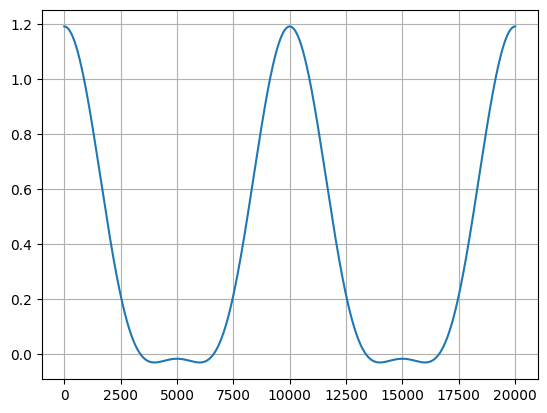

In [5]:
plot_meander(2, 5)

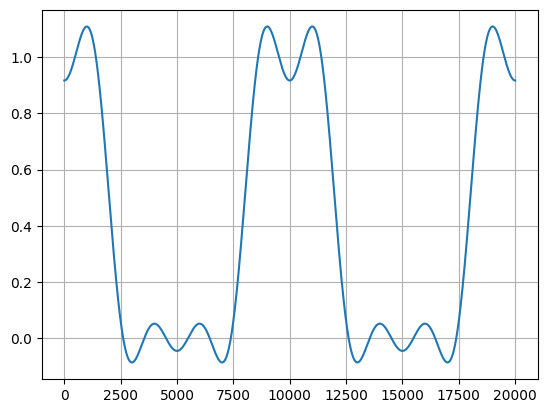

In [6]:
plot_meander(5, 5)

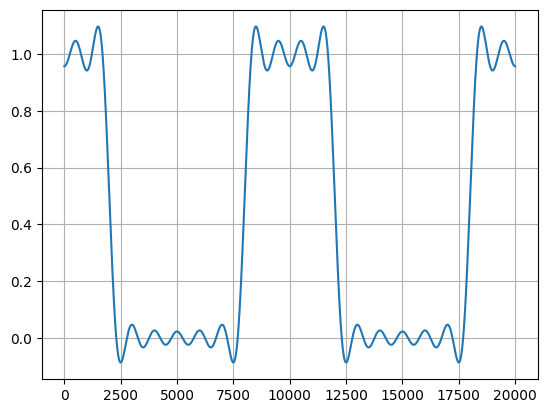

In [7]:
plot_meander(10, 5)

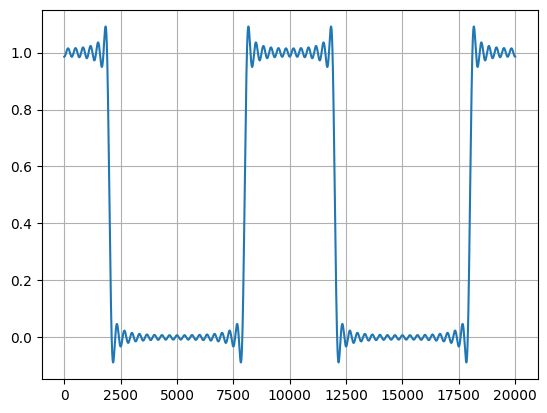

In [8]:
plot_meander(30, 5)

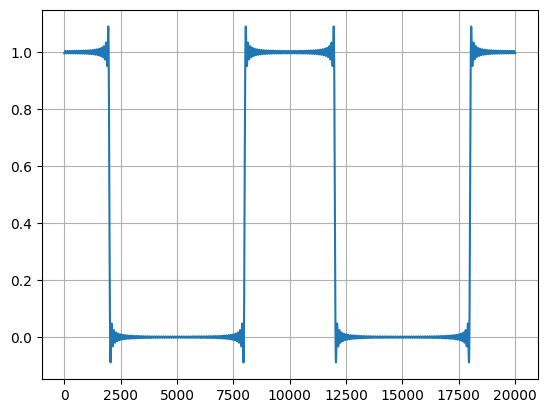

In [9]:
plot_meander(100, 5)

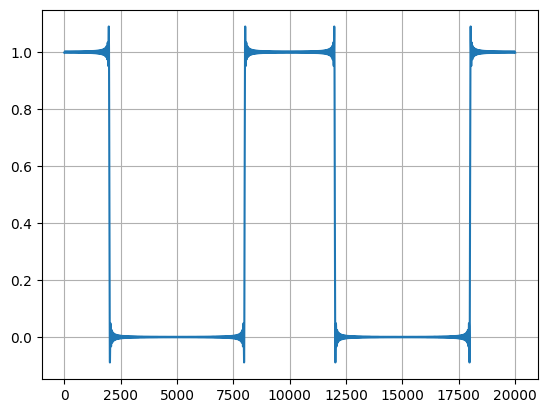

In [10]:
plot_meander(200, 5)

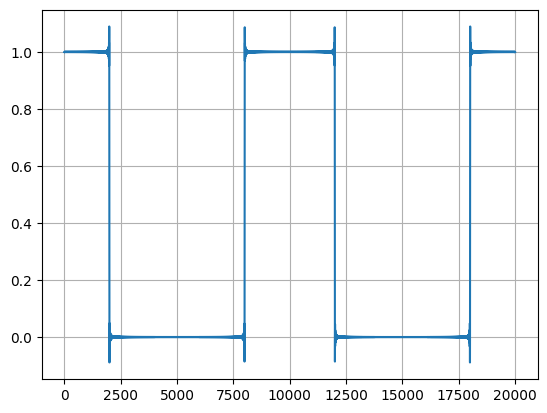

In [11]:
plot_meander(1000, 5)

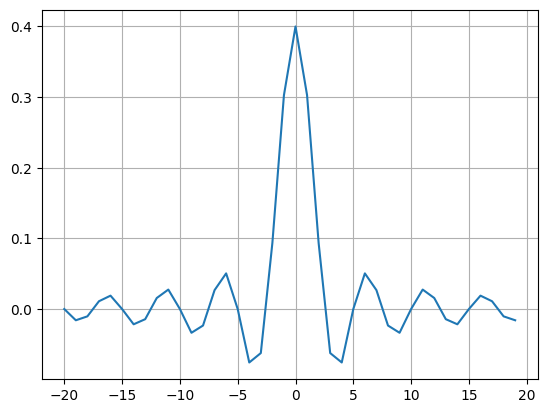

In [13]:
T = 5
w = 2. * np.pi / T
C_k = [get_C_k_meander(k, w, T) for k in np.arange(-20, 20, 1)]
plt.grid()
plt.plot(np.arange(-20, 20, 1), C_k)

Вычислим погрешность для меандра

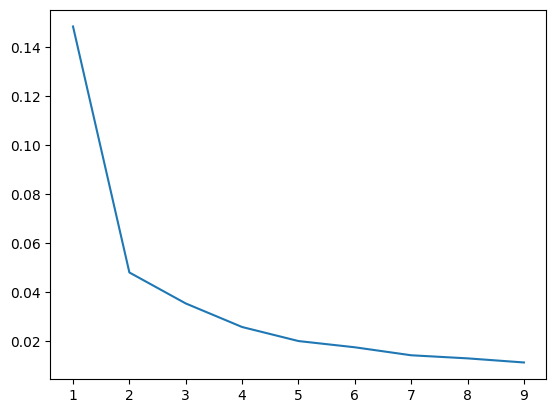

In [14]:
def get_err_meander(n):
    # норма для функции меандра равна 1
    left_sum = sum(get_C_k_meander(k, w, T) ** 2 for k in np.arange(-1000, -n))
    right_sum = sum(get_C_k_meander(k, w, T) ** 2 for k in np.arange(n, 1000))
    return left_sum + right_sum

err_graph = [get_err_meander(n) for n in range(1, 10)]
plt.plot(range(1, 10), err_graph)

Вычислим погрешность для "пилы"

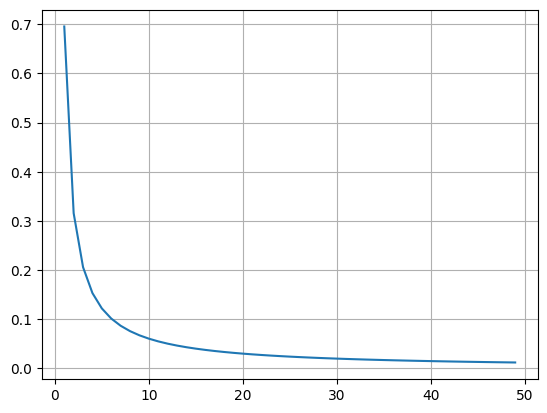

In [16]:
def get_C_k_saw(k):
    if k == 0:
        return 0
    elif k > 0:
        return np.abs(-1j * (-1.)**(k + 1) / k)
    else:
        return np.abs(1j * (-1.)**(k + 1) / k)

def get_err_saw(n):
    left_sum = sum(get_C_k_saw(k) ** 2 for k in np.arange(-1000, -n)) / (np.pi ** 2 / 3)
    right_sum = sum(get_C_k_saw(k) ** 2 for k in np.arange(n, 1000)) / (np.pi ** 2 / 3)
    return left_sum + right_sum

err_graph = [get_err_saw(n) for n in range(1, 50)]
plt.grid()
plt.plot(range(1, 50), err_graph)